# Name : Ali Ahmed Hassan 
# ID :1808627

# Import needed libraries

In [ ]:
pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import os,datetime
import idx2numpy
import gc


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers import ZeroPadding2D 


from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import keras_tuner as kt
from kerastuner import HyperModel


from keras.applications.vgg16 import VGG16
from keras.applications import MobileNetV2
from keras.models import Model


<ipython-input-1-ce57c3e613ff>:31: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#commands to display the whole contents of the colomns of our data
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load the data

In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/DL_project2/fashion-mnist_train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/DL_project2/fashion-mnist_test.csv")

## Split the labels and features

In [ ]:
x_train=train_data.drop(columns=['label'])
y_train=train_data[['label']]

x_test=test_data.drop(columns=['label'])
y_test=test_data[['label']]

# Describe the data

## Datasets shapes

In [ ]:
print("train Dataset shape: ",train_data.shape) 
print("\ntest Dataset shape: ",test_data.shape) 

train Dataset shape:  (60000, 785)

test Dataset shape:  (10000, 785)


In [ ]:

print("x_train shape: ",x_train.shape) 
print("\ny_train shape: ",y_train.shape) 

print("\n\nx_test shape: ",x_test.shape) 
print("\ny_test shape: ",y_test.shape) 

x_train shape:  (60000, 784)

y_train shape:  (60000, 1)


x_test shape:  (10000, 784)

y_test shape:  (10000, 1)


In [ ]:
#view the first 5 data sample in train data with their features 
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [ ]:
#view the last 5 data sample in train data with their features 
train_data.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [ ]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [ ]:
#train_data.info

In [ ]:

#view the first 5 data sample in the test dataset with their features 
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [ ]:
#view the last 5 data sample in the test dataset with their features 
test_data.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [ ]:
test_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [ ]:
#test_data.info

### Explain the classes in train data

In [ ]:
print(train_data['label'].unique())

[2 9 6 0 3 4 5 8 7 1]


### Explain the classes in the test data

In [ ]:
print(test_data['label'].unique())

[0 1 2 3 8 6 5 4 7 9]


#### Conclusion of data description
Our Data is diveded into train dataset and dataset


*   Train Dataset: contains 60,000 image each image with size 28x28 thats explain why we have 784 feature, also we have an extra coloumn for labels  
*   Test Dataset: contains 10,000 image with the same size of the train Dataset.
*   Classes: we have 10 classes are labeled from 0 to 9 



# Clean the Data

## Check missing values

In [ ]:
#check if any col has a missing value
train_data.isnull().sum().any()

False

no missing values

## check duplicates values

In [ ]:
train_data.duplicated().any()

True

In [ ]:
#drop the duplicated rows 
train_data=train_data.drop_duplicates()

In [ ]:
train_data.shape

(59957, 785)

there are 43 duplicated images

In [ ]:
x_train=train_data.drop(columns=['label'])
y_train=train_data[['label']]

In [ ]:
x_train.shape

(59957, 784)

# Data visualization

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


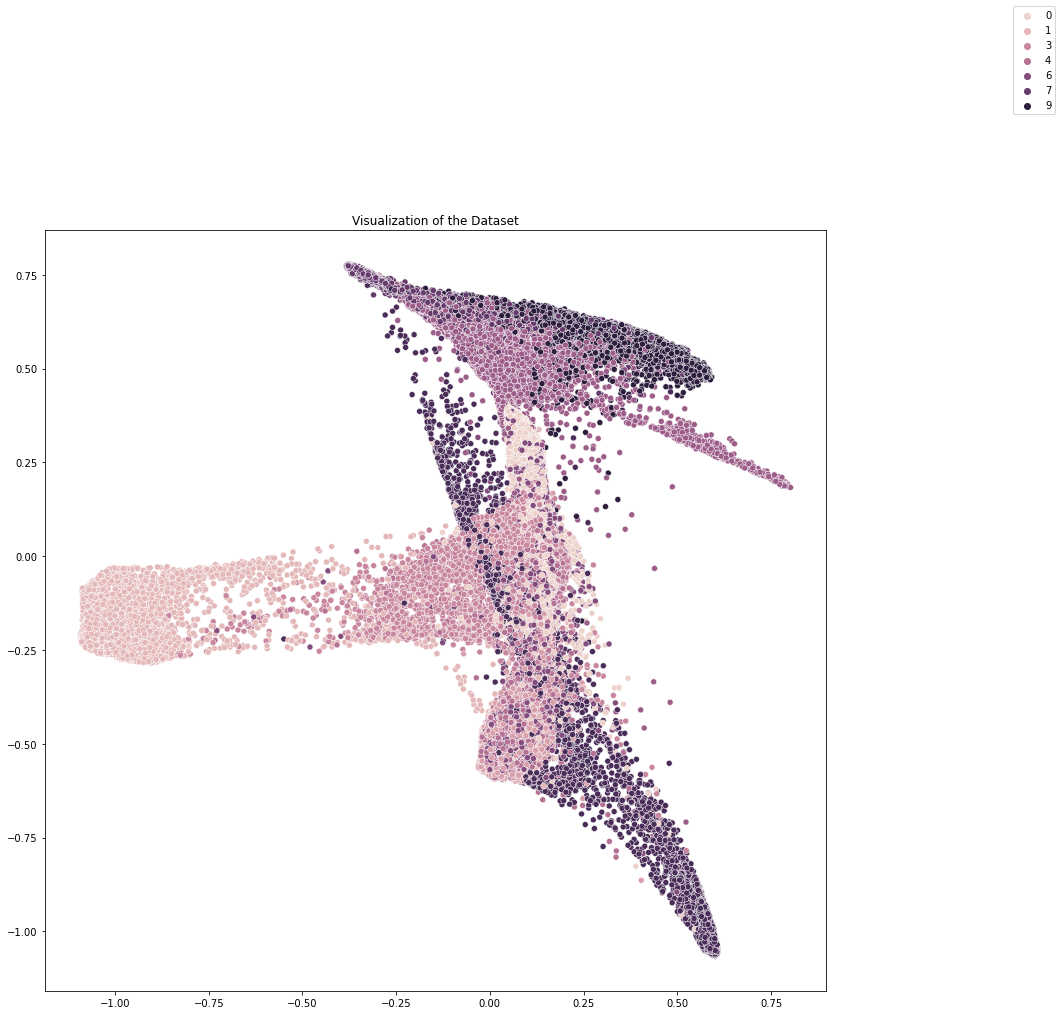

In [ ]:
tsne = TSNE(n_components= 2, n_iter= 300, learning_rate= 20, perplexity= 20)
x_train_embedded = tsne.fit_transform(x_train)
emb_x = x_train_embedded[:,0]
emb_y = x_train_embedded[:,1]

# visualize the data
plt.figure(figsize=(14,14))
plt.title('Visualization of the Dataset')
plot = sns.scatterplot(x= emb_x, y= emb_y, hue= y_train['label'], legend= 'auto')
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1.3))

# Carry out required correlation analysis

In [1]:
#find the correlation matrix
correlation_matrix=x_train.corr()
#correlation_matrix

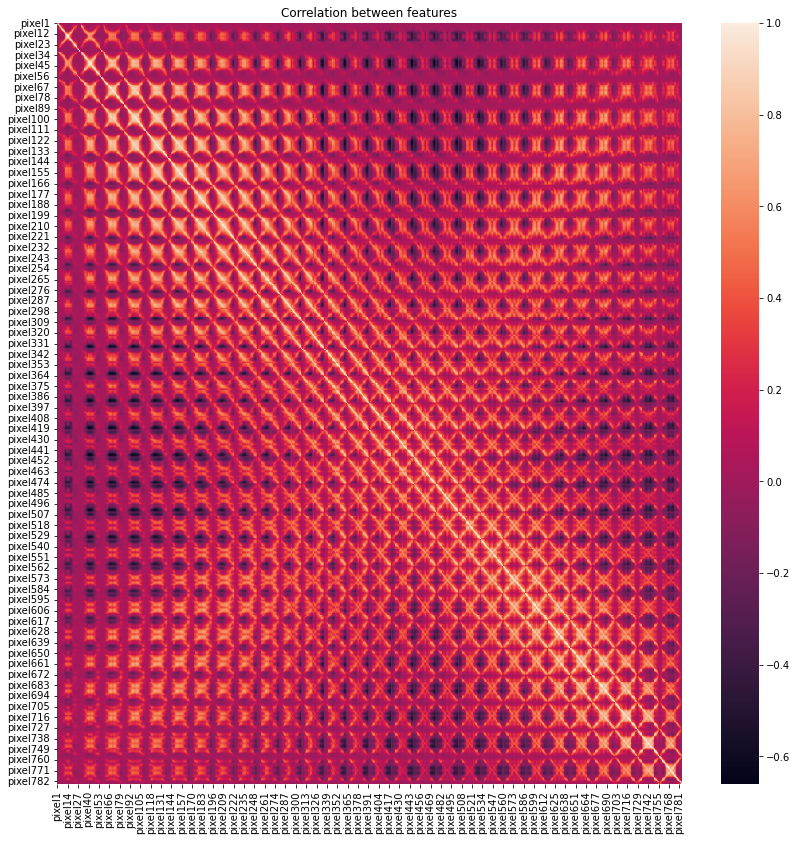

In [ ]:
#visualization of the correlation matrix
plt.figure(figsize=(14,14))
plt.title('Correlation between features')
sns.heatmap(correlation_matrix)

In [ ]:
# calc absolute values
correlation_matrix_abs = correlation_matrix.abs()
upper_matrix = correlation_matrix_abs.where(np.triu(np.ones(correlation_matrix_abs.shape),k=1).astype(np.bool_))
# check to see if there is a column has a correlation higher than 0.95
correlation_threshold = 0.95
col_with_high_correlation = [col for col in upper_matrix.columns if np.any(upper_matrix[col] > correlation_threshold)]
print('Columns with high correlations: \n',col_with_high_correlation)

Columns with high correlations: 
 ['pixel43', 'pixel203', 'pixel204', 'pixel231', 'pixel232', 'pixel259', 'pixel260']


# Label Encoding

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
print (y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


# Show images

In [ ]:

file = '/content/drive/MyDrive/DL_project2/train-images-idx3-ubyte'
arr = idx2numpy.convert_from_file(file)

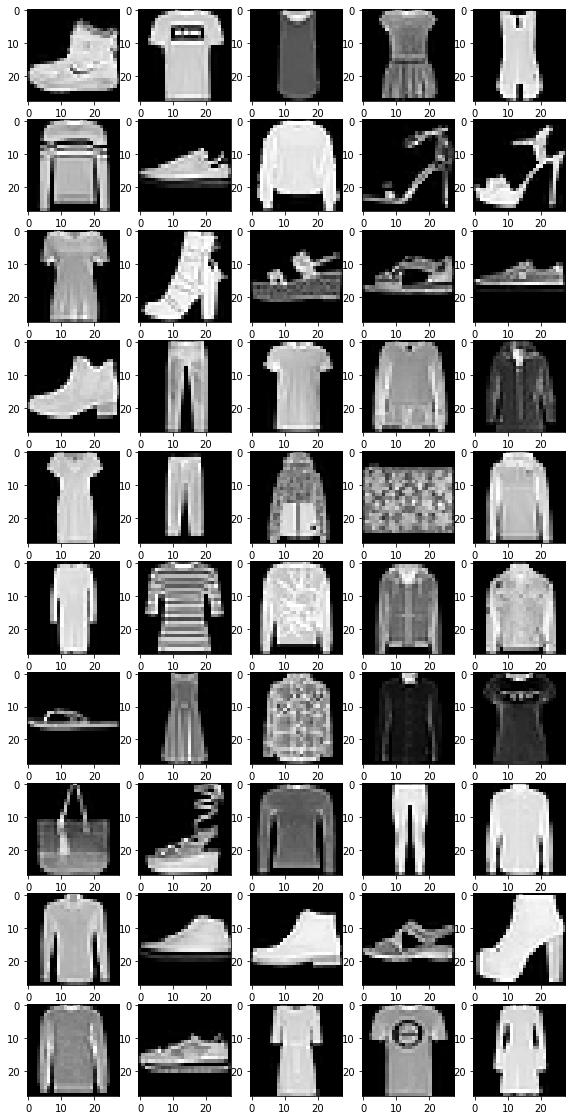

In [ ]:
fig, axs = plt.subplots(10,5, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
i=0
axs = axs.ravel()
for i in range (0,50):
    axs[i].imshow(arr[i],cmap='gray')

In [ ]:
del(train_data)

### Preparing images to CNN models

In [ ]:
#normalize the images to ensure that the batch of images have a mean of 0 and a standard deviation of 1
x_train =x_train/255
x_test=x_test/255

x_train =x_train.values.reshape(-1,28,28,)
x_train = np.expand_dims(x_train, -1)


x_test=x_test.values.reshape(-1,28,28,)
x_test = np.expand_dims(x_test, -1)


In [ ]:
print("X_train dim: ",x_train.shape)
print("X_test dim: ",x_test.shape)
print("y_train dim: ",y_train.shape)

X_train dim:  (59957, 28, 28, 1)
X_test dim:  (10000, 28, 28, 1)
y_train dim:  (59957, 10)


In [ ]:
#split data into training and validation datasets
X_train,x_val,Y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)


In [ ]:
y_train.shape

(59957, 10)

# Training CNN Neural Networks 

## LeNet-5 archeticture

In [ ]:
def build_LeNet_5(num_filtersC1=6,kernel_sizeC1=(5,5),num_filtersC3=16,activation_func='relu',D4_units=120,D5_units=84,D6_units=10,optimizer='Adam'):
  model=Sequential()
  model.add(Conv2D(filters=num_filtersC1,kernel_size=kernel_sizeC1,input_shape=(28,28,1),activation=activation_func))
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(filters=num_filtersC3,kernel_size=kernel_sizeC1,activation=activation_func))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  #model.add(Dense(D4_units,activation=activation_func))

  model.add(Dense(D4_units,activation=activation_func))

  model.add(Dense(D5_units,activation=activation_func))

  model.add(Dense(D6_units,activation='softmax'))
  
  model.compile(loss=CategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
#instantiate leNet model by the actual architecture
actual_lenet_model= build_LeNet_5()
#fitting the model to our data
actual_lenet5_history=actual_lenet_model.fit(X_train,Y_train,batch_size=128,epochs=20,verbose=2,validation_data=(x_val,y_val))

Epoch 1/20
375/375 - 5s - loss: 0.7444 - accuracy: 0.7246 - val_loss: 0.5453 - val_accuracy: 0.8026 - 5s/epoch - 13ms/step
Epoch 2/20
375/375 - 2s - loss: 0.4826 - accuracy: 0.8236 - val_loss: 0.4430 - val_accuracy: 0.8441 - 2s/epoch - 4ms/step
Epoch 3/20
375/375 - 2s - loss: 0.4156 - accuracy: 0.8508 - val_loss: 0.3946 - val_accuracy: 0.8601 - 2s/epoch - 4ms/step
Epoch 4/20
375/375 - 1s - loss: 0.3819 - accuracy: 0.8625 - val_loss: 0.3810 - val_accuracy: 0.8657 - 1s/epoch - 4ms/step
Epoch 5/20
375/375 - 2s - loss: 0.3564 - accuracy: 0.8711 - val_loss: 0.3639 - val_accuracy: 0.8654 - 2s/epoch - 4ms/step
Epoch 6/20
375/375 - 2s - loss: 0.3338 - accuracy: 0.8798 - val_loss: 0.3399 - val_accuracy: 0.8762 - 2s/epoch - 4ms/step
Epoch 7/20
375/375 - 2s - loss: 0.3162 - accuracy: 0.8861 - val_loss: 0.3377 - val_accuracy: 0.8779 - 2s/epoch - 4ms/step
Epoch 8/20
375/375 - 2s - loss: 0.3019 - accuracy: 0.8910 - val_loss: 0.3275 - val_accuracy: 0.8841 - 2s/epoch - 4ms/step
Epoch 9/20
375/375 - 2s

# Hyperparameters tuning

##Define Search space

In [ ]:

class ANNHyperModel(HyperModel):
    
    def build(self, hp):
       activation_func= hp.Choice('activation',['relu','tanh'])
       optimizer_hp= hp.Choice('optimizer',['Adam', 'SGD', 'RMSprop'])
       dropout_rate=hp.Choice('rate',[0.0,0.4,0.7])
       dropout_rate2=hp.Choice('rate',[0.0,0.4,0.7])

       model=Sequential()
       model.add(Conv2D(filters=6,kernel_size=(5,5),input_shape=(28,28,1),activation=activation_func))
       model.add(MaxPooling2D(pool_size=(2, 2)))


       model.add(Conv2D(filters=16,kernel_size=(5,5),activation=activation_func))
       model.add(MaxPooling2D(pool_size=(2, 2)))

       model.add(Flatten())
       

       model.add(Dense(120,activation=activation_func))
       model.add(Dropout(dropout_rate))

       model.add(Dense(84,activation=activation_func))
       model.add(Dropout(dropout_rate2))


       model.add(Dense(10,activation='softmax'))

       model.compile(loss=CategoricalCrossentropy(), optimizer=optimizer_hp, metrics=['accuracy'])

      
     
       model.compile(
          optimizer=optimizer_hp,
          loss='categorical_crossentropy',
          metrics=['categorical_accuracy']
      )

       return model

hypermodel = ANNHyperModel()

tuner = kt.Hyperband(
    hypermodel,
    max_epochs=10,
    objective='val_loss',
    factor=3,
    directory='keras_tuner_dir',
    project_name='FashionMnist_DL'
)

tuner.search(X_train, Y_train, epochs=10, validation_data= (x_val, y_val))

In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal optimizer is {best_hps.get('optimizer')} and the best droup out rate for the  dense layers is {best_hps.get('rate') }""")


The hyperparameter search is complete. The optimal optimizer is RMSprop and the best droup out rate for the  dense layers is 0.0


#Evaluate the model using 5-fold cross-validation

measure the accuarcy and loss for each iteration (1-fold) and optain which batch size is better for our model from the vaues (32,64)

In [ ]:
#candidates of the batch size
batch_size=[32,64]

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation

for batch_size_cand in batch_size:
  fold_no = 1
  print(f'batch size is {batch_size_cand}: ')
  for train, val in kfold.split(x_train, y_train):
    model=build_LeNet_5(optimizer=best_hps.get('optimizer'))
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(x_train[train], y_train[train],
                batch_size=batch_size_cand,
                verbose=2)

    # Generate generalization metrics
    scores = model.evaluate(x_train[val], y_train[val], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
  print('------------------------------------------------------------------------')
  print('Score per fold')
  for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  print('------------------------------------------------------------------------')
  print('Average scores for all folds:')
  print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
  print(f'> Loss: {np.mean(loss_per_fold)}')
  print('------------------------------------------------------------------------')



batch size is 32: 
------------------------------------------------------------------------
Training for fold 1 ...
1499/1499 - 6s - loss: 0.5768 - accuracy: 0.7863 - 6s/epoch - 4ms/step
Score for fold 1: loss of 0.3976200222969055; accuracy of 85.54036021232605%
------------------------------------------------------------------------
Training for fold 2 ...
1499/1499 - 6s - loss: 0.5985 - accuracy: 0.7785 - 6s/epoch - 4ms/step
Score for fold 2: loss of 0.42647355794906616; accuracy of 84.38125252723694%
------------------------------------------------------------------------
Training for fold 3 ...
1499/1499 - 6s - loss: 0.5760 - accuracy: 0.7887 - 6s/epoch - 4ms/step
Score for fold 3: loss of 0.42963626980781555; accuracy of 84.20482277870178%
------------------------------------------------------------------------
Training for fold 4 ...
1499/1499 - 6s - loss: 0.5744 - accuracy: 0.7877 - 6s/epoch - 4ms/step
Score for fold 4: loss of 0.4424697458744049; accuracy of 82.72871375083923%

From the results, it is better to use batch size = 32 

In [ ]:
#Trying different values for epochs 
epochs=[10,20,30]
for numOfEpochs_cand in epochs:
  fold_no = 1
  print(f'number of epochs is {numOfEpochs_cand}: ')
  for train, val in kfold.split(x_train, y_train):
    model=build_LeNet_5(optimizer=best_hps.get('optimizer'))
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(x_train[train], y_train[train],
                epochs=numOfEpochs_cand,
                batch_size=32,
                verbose=2)

    # Generate generalization metrics
    scores = model.evaluate(x_train[val], y_train[val], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
  print('------------------------------------------------------------------------')
  print('Score per fold')
  for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  print('------------------------------------------------------------------------')
  print('Average scores for all folds:')
  print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
  print(f'> Loss: {np.mean(loss_per_fold)}')
  print('------------------------------------------------------------------------')


number of epochs is 10: 
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
1499/1499 - 6s - loss: 0.6119 - accuracy: 0.7746 - 6s/epoch - 4ms/step
Epoch 2/10
1499/1499 - 5s - loss: 0.3934 - accuracy: 0.8561 - 5s/epoch - 3ms/step
Epoch 3/10
1499/1499 - 8s - loss: 0.3365 - accuracy: 0.8766 - 8s/epoch - 5ms/step
Epoch 4/10
1499/1499 - 6s - loss: 0.3069 - accuracy: 0.8879 - 6s/epoch - 4ms/step
Epoch 5/10
1499/1499 - 5s - loss: 0.2875 - accuracy: 0.8940 - 5s/epoch - 3ms/step
Epoch 6/10
1499/1499 - 5s - loss: 0.2735 - accuracy: 0.9009 - 5s/epoch - 3ms/step
Epoch 7/10
1499/1499 - 5s - loss: 0.2646 - accuracy: 0.9040 - 5s/epoch - 3ms/step
Epoch 8/10
1499/1499 - 5s - loss: 0.2573 - accuracy: 0.9064 - 5s/epoch - 3ms/step
Epoch 9/10
1499/1499 - 5s - loss: 0.2514 - accuracy: 0.9086 - 5s/epoch - 3ms/step
Epoch 10/10
1499/1499 - 5s - loss: 0.2469 - accuracy: 0.9118 - 5s/epoch - 3ms/step
Score for fold 1: loss of 0.32224953174591064; accuracy o

The maximum value of the average validation accuracy with epochs =30

In [ ]:
del(model)
del(acc_per_fold)
del(loss_per_fold)

Then our tuned hyperparam are:

*   Optimizer    -->   RmSprop 
*   Dropout rate -->   0
*   Batch size   -->   32
*   number of epochs-->30





In [ ]:
#build a model with tuned parameters 
tuned_model=build_LeNet_5(optimizer=best_hps.get('optimizer'))
tuned_model_history =tuned_model.fit(X_train, Y_train,epochs=30,
                batch_size=32,validation_data=(x_val,y_val),
                verbose=2)



Epoch 1/30
1499/1499 - 8s - loss: 0.5898 - accuracy: 0.7814 - val_loss: 0.4296 - val_accuracy: 0.8441 - 8s/epoch - 5ms/step
Epoch 2/30
1499/1499 - 6s - loss: 0.3957 - accuracy: 0.8564 - val_loss: 0.3737 - val_accuracy: 0.8614 - 6s/epoch - 4ms/step
Epoch 3/30
1499/1499 - 6s - loss: 0.3498 - accuracy: 0.8739 - val_loss: 0.3412 - val_accuracy: 0.8749 - 6s/epoch - 4ms/step
Epoch 4/30
1499/1499 - 6s - loss: 0.3205 - accuracy: 0.8839 - val_loss: 0.3332 - val_accuracy: 0.8802 - 6s/epoch - 4ms/step
Epoch 5/30
1499/1499 - 6s - loss: 0.3025 - accuracy: 0.8905 - val_loss: 0.3304 - val_accuracy: 0.8810 - 6s/epoch - 4ms/step
Epoch 6/30
1499/1499 - 6s - loss: 0.2856 - accuracy: 0.8955 - val_loss: 0.3239 - val_accuracy: 0.8868 - 6s/epoch - 4ms/step
Epoch 7/30
1499/1499 - 6s - loss: 0.2736 - accuracy: 0.9008 - val_loss: 0.3340 - val_accuracy: 0.8848 - 6s/epoch - 4ms/step
Epoch 8/30
1499/1499 - 6s - loss: 0.2675 - accuracy: 0.9032 - val_loss: 0.3524 - val_accuracy: 0.8753 - 6s/epoch - 4ms/step
Epoch 9/

# Evaluation curves

In [ ]:
def plot_acc_loss(history,model_name):
  #adjust sub plots and sizes of the graphs
  fig , axis = plt.subplots(nrows=1, ncols=2)
  #fig.subplots_adjust( wspace=3)
  fig.set_figheight(8)
  fig.set_figwidth(20)
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # accuracy
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epoch = np.arange(150)

  # loss curve
  axis[0].plot(loss,label='Train')
  axis[0].plot(val_loss,label='Validation')
  axis[0].set_ylabel('loss')
  axis[0].set_xlabel('epoch')
  axis[0].set_title(model_name+': Loss vs epoch number'  )
  axis[0].legend()

  # accuracy curve
  axis[1].plot(accuracy, label='Train')
  axis[1].plot(val_accuracy, label='Validation')
  axis[1].set_ylabel('accuracy')
  axis[1].set_xlabel('epoch')
  axis[1].set_title(model_name+': Accuracy vs epoch number ')
  axis[1].legend()


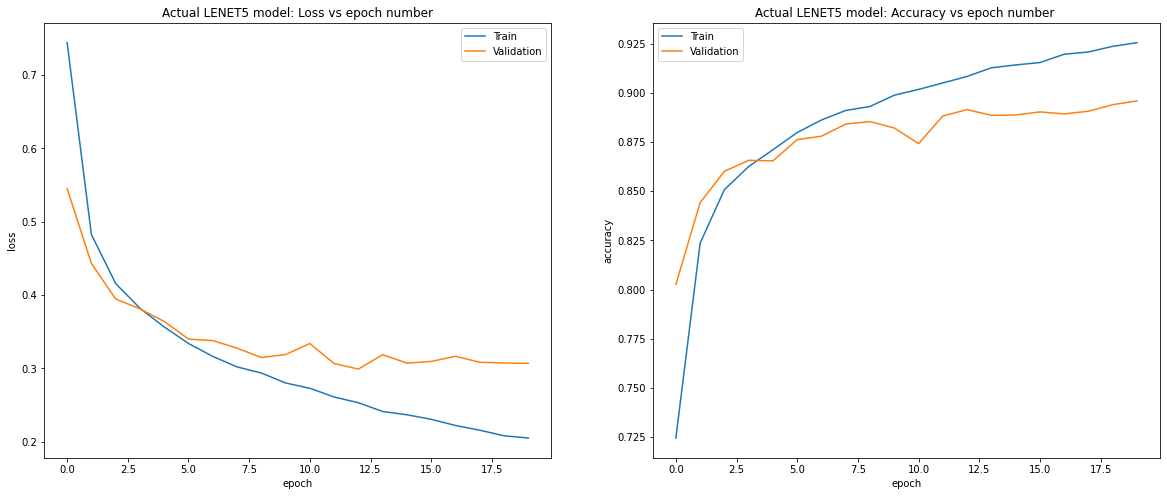

In [ ]:
plot_acc_loss(actual_lenet5_history,"Actual LENET5 model")

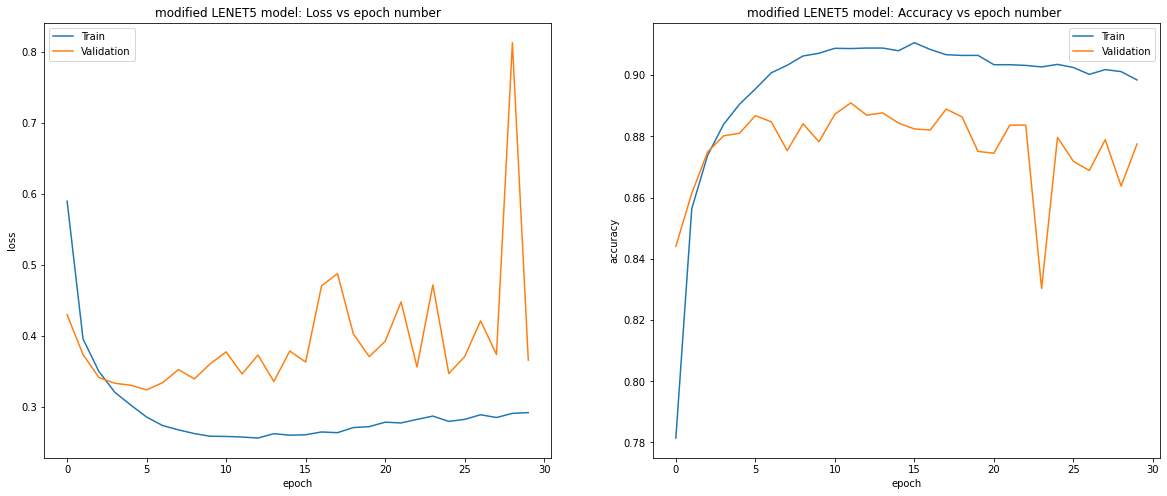

In [ ]:
plot_acc_loss(tuned_model_history,"modified LENET5 model")

In [ ]:
loss_actual_lenet, accuracy_actual_lenet=actual_lenet_model.evaluate(x_test,y_test,batch_size=32)
print (f"Actual LeNet-5:\nloss over test data: {loss_actual_lenet} and accuracy is {accuracy_actual_lenet}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2964 - accuracy: 0.8990
Actual LeNet-5:
loss over test data: 0.2963719069957733 and accuracy is 0.8989999890327454


In [ ]:
loss_tuned_lenet, accuracy_tuned_lenet=tuned_model.evaluate(x_test,y_test,batch_size=32)
print (f"Tuned LeNet-5 :\nloss over test data: {loss_tuned_lenet} and accuracy is {accuracy_tuned_lenet}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3422 - accuracy: 0.8832
Tuned LeNet-5 :
loss over test data: 0.3421661853790283 and accuracy is 0.8831999897956848


In [ ]:
del(tuned_model_history)
del(actual_lenet_model)
del(actual_lenet5_history)
del(tuned_model)

#Transfer Learning 

###preprocessing The data for pretrained architectures

In [ ]:
x_train_trans=ZeroPadding2D(padding=((4,0),(4,0)))(X_train)
x_train_trans=np.repeat(x_train_trans, 3, axis=3)


x_val_trans=ZeroPadding2D(padding=((4,0),(4,0)))(x_val)
x_val_trans=np.repeat(x_val_trans, 3, axis=3)


x_test_trans=ZeroPadding2D(padding=((4,0),(4,0)))(x_test)
x_test_trans=np.repeat(x_test_trans, 3, axis=3)

##1-VGG16 architecture

In [ ]:
conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_tensor=Input(shape=(32, 32, 3)))
for layer in conv_base.layers:
  layer.trainable = False
top_model = conv_base.output
top_model = Flatten(name="flatten")(top_model)
top_model = Dense(4096, activation='relu')(top_model)
top_model = Dense(1072, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
output_layer = Dense(10, activation='softmax')(top_model)
vgg16_model = Model(inputs=conv_base.input, outputs=output_layer)

In [ ]:
vgg16_model.compile(optimizer=best_hps.get('optimizer'), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
callback =EarlyStopping(monitor='val_loss', mode='min',patience=50)
vgg16_history=vgg16_model.fit(x_train_trans,Y_train,
                            batch_size=32,
                            epochs=30,
                            validation_data=(x_val_trans,y_val),
                            callbacks=[callback],
                            verbose=2)


Epoch 1/30
1499/1499 - 23s - loss: 0.6001 - accuracy: 0.7890 - val_loss: 0.4964 - val_accuracy: 0.8145 - 23s/epoch - 15ms/step
Epoch 2/30
1499/1499 - 21s - loss: 0.4881 - accuracy: 0.8319 - val_loss: 0.4861 - val_accuracy: 0.8351 - 21s/epoch - 14ms/step
Epoch 3/30
1499/1499 - 20s - loss: 0.4701 - accuracy: 0.8427 - val_loss: 0.4407 - val_accuracy: 0.8520 - 20s/epoch - 14ms/step
Epoch 4/30
1499/1499 - 22s - loss: 0.4619 - accuracy: 0.8462 - val_loss: 0.4498 - val_accuracy: 0.8486 - 22s/epoch - 15ms/step
Epoch 5/30
1499/1499 - 22s - loss: 0.4569 - accuracy: 0.8491 - val_loss: 0.4593 - val_accuracy: 0.8566 - 22s/epoch - 15ms/step
Epoch 6/30
1499/1499 - 22s - loss: 0.4553 - accuracy: 0.8513 - val_loss: 0.4758 - val_accuracy: 0.8571 - 22s/epoch - 15ms/step
Epoch 7/30
1499/1499 - 20s - loss: 0.4610 - accuracy: 0.8540 - val_loss: 0.5221 - val_accuracy: 0.8415 - 20s/epoch - 14ms/step
Epoch 8/30
1499/1499 - 21s - loss: 0.4615 - accuracy: 0.8553 - val_loss: 0.5168 - val_accuracy: 0.8501 - 21s/ep

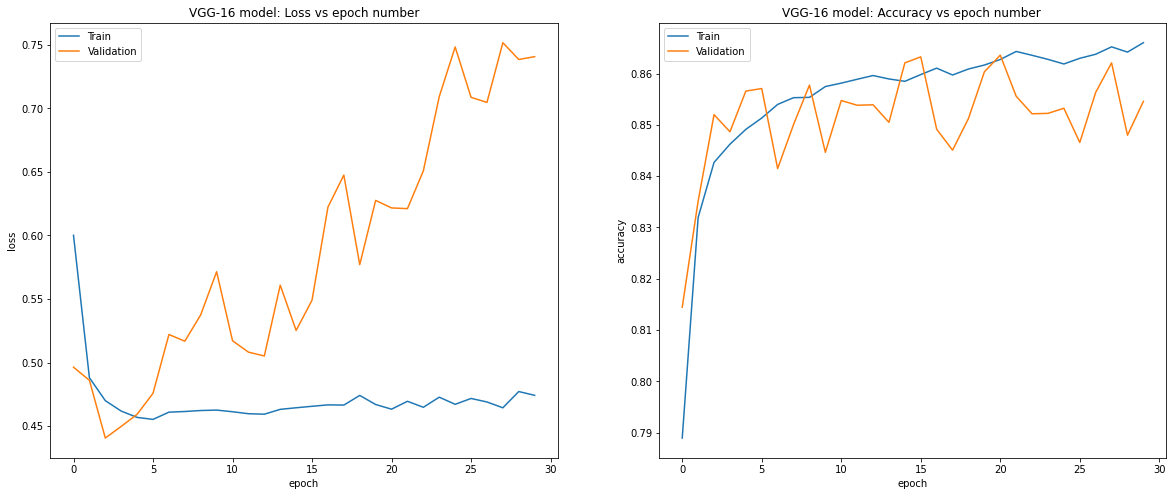

In [ ]:
plot_acc_loss(vgg16_history,"VGG-16 model")

In [ ]:
loss_vgg16, accuracy_vgg16=vgg16_model.evaluate(x_test_trans,y_test,batch_size= 32)
print (f"loss over test data: {loss_vgg16} and accuracy is {accuracy_vgg16}")

313/313 [==============================] - 3s 11ms/step - loss: 0.7017 - accuracy: 0.8564
loss over test data: 0.7017080187797546 and accuracy is 0.8564000129699707


In [ ]:
#free some variables from ram to avoid runtime crashes
del conv_base
del vgg16_model
del vgg16_history
del top_model
gc.collect()

11607

## 2-MobileNetV2

In [ ]:
conv_base=MobileNetV2(input_shape=(32,32,3),
                      include_top=False,
                      weights='imagenet')

In [ ]:
for layer in conv_base.layers:
  layer.trainable = False
top_model = conv_base.output
top_model = Flatten(name="flatten")(top_model)
top_model = Dense(4096, activation='relu')(top_model)
top_model = Dense(1072, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
output_layer = Dense(10, activation='softmax')(top_model)
MobileNet_model = Model(inputs=conv_base.input, outputs=output_layer)

In [ ]:
MobileNet_model.compile(optimizer=best_hps.get('optimizer'), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
MobileNet_history=MobileNet_model.fit(x_train_trans,Y_train,
                            batch_size=32,
                            epochs=30,
                            validation_data=(x_val_trans,y_val),
                            callbacks=[callback],
                            verbose=2)



Epoch 1/30
1499/1499 - 21s - loss: 1.0533 - accuracy: 0.6200 - val_loss: 1.0264 - val_accuracy: 0.6463 - 21s/epoch - 14ms/step
Epoch 2/30
1499/1499 - 17s - loss: 0.9707 - accuracy: 0.6617 - val_loss: 0.9999 - val_accuracy: 0.6625 - 17s/epoch - 11ms/step
Epoch 3/30
1499/1499 - 17s - loss: 0.9497 - accuracy: 0.6755 - val_loss: 1.0122 - val_accuracy: 0.6614 - 17s/epoch - 12ms/step
Epoch 4/30
1499/1499 - 17s - loss: 0.9289 - accuracy: 0.6844 - val_loss: 1.0320 - val_accuracy: 0.6673 - 17s/epoch - 11ms/step
Epoch 5/30
1499/1499 - 17s - loss: 0.9120 - accuracy: 0.6908 - val_loss: 1.0394 - val_accuracy: 0.6711 - 17s/epoch - 11ms/step
Epoch 6/30
1499/1499 - 17s - loss: 0.8984 - accuracy: 0.6956 - val_loss: 1.0852 - val_accuracy: 0.6644 - 17s/epoch - 12ms/step
Epoch 7/30
1499/1499 - 17s - loss: 0.8880 - accuracy: 0.6979 - val_loss: 1.0837 - val_accuracy: 0.6757 - 17s/epoch - 11ms/step
Epoch 8/30
1499/1499 - 17s - loss: 0.8788 - accuracy: 0.7041 - val_loss: 1.1672 - val_accuracy: 0.6722 - 17s/ep

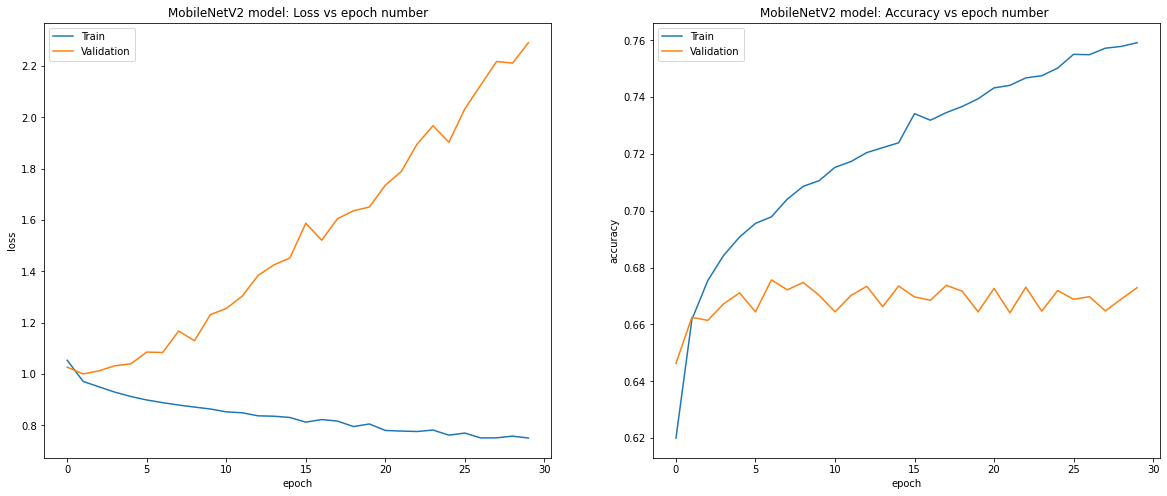

In [ ]:
plot_acc_loss(MobileNet_history,"MobileNetV2 model")


In [ ]:
MobileNet_loss, MobileNet_accuracy=MobileNet_model.evaluate(x_test_trans,y_test)
print (f"loss over test data: {MobileNet_loss} and accuracy is {MobileNet_accuracy}")

313/313 [==============================] - 3s 9ms/step - loss: 2.0307 - accuracy: 0.6756
loss over test data: 2.0306975841522217 and accuracy is 0.675599992275238
